<a href="https://colab.research.google.com/github/alandesson/puc-pos-fakenews/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo: Utilizar Métodos de Classficação para Determinar se uma Notícia é Falsa**

**Descrição do Problema**:
O problema consiste em desenvolver um sistema de classificação capaz de detectar se uma notícia é falsa ou verdadeira com base em seu conteúdo. Isso é crucial devido à disseminação de informações enganosas e falsas, especialmente nas mídias sociais e na internet, que podem influenciar negativamente a opinião pública e até mesmo levar a decisões prejudiciais.

**Premissas ou Hipóteses**:

Notícias falsas podem conter linguagem sensacionalista, informações não verificadas, fontes não confiáveis ou discrepâncias com fatos bem estabelecidos.
Por tanto, é possivel criar uma classificador que possa ser utilizado para sinalizar se uma nóticia pode ser falsa.

**Descrição do Dataset**:

O dataset contém atributos textuais como:

*   Título
*   Corpo do texto
*   Assunto
*   Data

O dataset está dividido em dois CSVs, um para nóticias falsas e outro para nóticias verdadeiras.

Fonte do Dataset:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

**Preparação de Dados:**

O tratamento dos dados será feito utiliznado tecnicas como remoção da pontuação e stopwords e a tokenização e outras técnicas de pré-processamento de texto para padronizar o formato dos dados.

Em seguida será feita a junção dos dois CSVs e em seguida faremos uma randomização e separação dos dados em um conjunto de treinamento e teste. Tomando cuidado para garantir que as classes de notícias falsas e verdadeiras estejam balanceadas no conjunto de treinamento para evitar viés no modelo.

# **Carregando Base de Dados**

In [109]:
import pandas as pd

# URL do arquivo CSV no GitHub contendo CSV com Notícias Falsas
url_fake = 'https://raw.githubusercontent.com/alandesson/puc-pos-fakenews/main/datasets/fake.csv'
# URL do arquivo CSV no GitHub contendo CSV com Notícias Verdadeiras
url_real = 'https://raw.githubusercontent.com/alandesson/puc-pos-fakenews/main/datasets/true.csv'

# labels dos atributos do dataset
labels_atributos = ['Titulo','Texto','Assunto','Data']

# Carregando Dados
dados_fake = pd.read_csv(url_fake, skiprows=1, names=labels_atributos)
dados_real = pd.read_csv(url_real, skiprows=1, names=labels_atributos)

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(dados_fake.head())

                                              Titulo  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               Texto Assunto  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                Data  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [110]:
# adcionando uma coluna chamada de Rotulo, onde 0 é para Fake News e 1 para Nóticias Reais
dados_fake['Rotulo'] = 0
dados_real['Rotulo'] = 1

# Concatenando DataFrames em um único Dataframe
dados = pd.concat([dados_fake, dados_real])

print(dados.head())

                                              Titulo  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                               Texto Assunto  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                Data  Rotulo  
0  December 31, 2017       0  
1  December 31, 2017       0  
2  December 30, 2017       0  
3  December 29, 2017       0  
4  December 25, 2017       0  


Os dados foram concatenados pois facilita na hora de realizar a randomição da base para separação dos conjuntos de treinamento e teste.

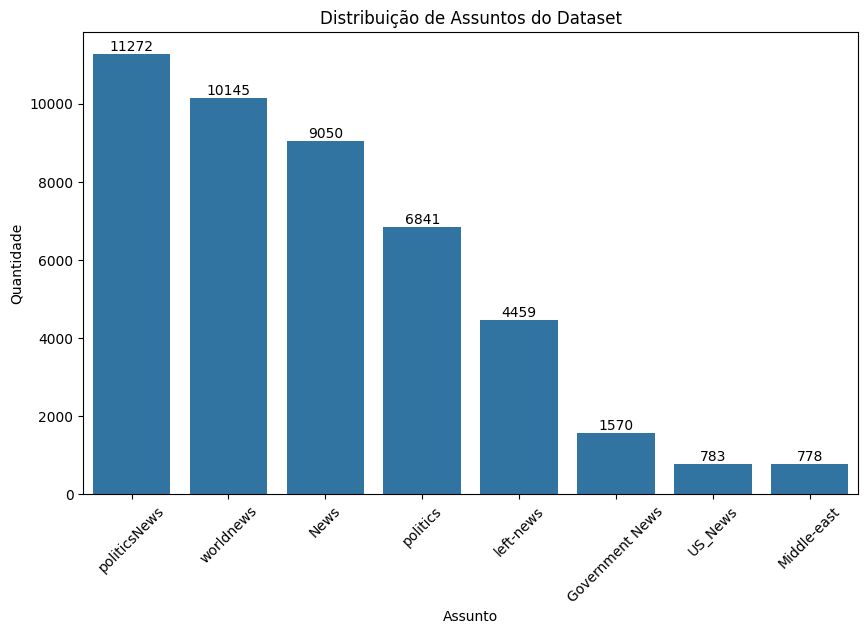

In [111]:
# Etapa Opcional utilizada para Visualizar a distribuição das nóticias por assunto

import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo a quantidade de nóticias por assunto
qtd_assuntos = dados['Assunto'].value_counts()

# Configurando Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=qtd_assuntos.index, y=qtd_assuntos.values)
plt.title('Distribuição de Assuntos do Dataset')
plt.xlabel('Assunto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Escrevendo Legendas com Valor de Cada Coluna
for index, value in enumerate(qtd_assuntos):
    plt.text(index, value+80, str(value), ha='center')

# Plotando Gráfico
plt.show()

# **Tratando base a base de dados**

In [112]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download de recursos do nltk
nltk.download('punkt')
nltk.download('stopwords')

 # Stemmer utilizado para reduzir Palavras para Forma Base
stemmer = PorterStemmer()

# Lista de Stopwords a serem removidas
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Definindo Função de Limpeza do Texto
def limparTexto(texto):
    # Tokenização
    tokens = word_tokenize(texto)

    # Remoção de Pontuação e Caracteres Especiais
    tokens = [word for word in tokens if word.isalnum()]

    # Conversão para Minúsculas
    tokens = [word.lower() for word in tokens]

    # Remoção de Stopwords - Removendo palavras com Baixo Significado
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming - Reduzindo Palavras para Forma Base
    return ' '.join([stemmer.stem(word) for word in tokens])

# limpando textos da base de dados
dados['Titulo'] = dados['Titulo'].apply(limparTexto)
dados['Texto'] = dados['Texto'].apply(limparTexto)

print(dados.head())


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Transformando valores Categoricos em Inteiros
print(dados['Assunto'].unique())
dados['Assunto'] = encoder.fit_transform(dados['Assunto'])
print(dados['Assunto'].unique())

In [53]:
# Transformando String Data em Valores Númericos
from datetime import datetime

if 'Data' in dados.columns:
    dados['Data'] = pd.to_datetime(dados['Data'], format="mixed", errors='coerce')
    dados = dados[dados['Data'].notna()]

    dados['Ano'] = dados['Data'].dt.year
    dados['Mes'] = dados['Data'].dt.month
    dados['Dia'] = dados['Data'].dt.day

    del dados['Data']

print(dados)

In [87]:
# Vetorizando Campos de Texto
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Quantidade máxima de features ou palavras unicas que serão extraidas do texto
qtd_max_features = 200

# Fazendo a Vetorização do texto
tfidf_vectorizer = TfidfVectorizer(max_features=qtd_max_features)

X_titulo = tfidf_vectorizer.fit_transform(dados['Titulo'])
X_texto = tfidf_vectorizer.fit_transform(dados['Texto'])

#Convertendo de Para Dataframe
X_titulo = X_titulo.toarray()
X_texto = X_texto.toarray()

X_titulo = pd.DataFrame(X_titulo, columns=tfidf_vectorizer.get_feature_names_out())
X_texto = pd.DataFrame(X_texto, columns=tfidf_vectorizer.get_feature_names_out())
# X_titulo = pd.DataFrame(X_titulo, columns=['Titulo'])
# X_texto = pd.DataFrame(X_titulo, columns=['Texto'])

In [88]:
# Normalizando Colunas do Dataset
from sklearn.preprocessing import MinMaxScaler

#Removendo Colunas com Texto antes de Normalizar
X_normalizado = dados.copy()
del X_normalizado['Titulo']
del X_normalizado['Texto']
colunas = X_normalizado.columns

# Normalização Min-Max
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(X_normalizado)
X_normalizado = pd.DataFrame(dados_normalizados, columns=colunas)

print("DataFrame normalizado (Min-Max):")
print(X_normalizado)

DataFrame normalizado (Min-Max):
        Assunto  Rotulo       Ano       Mes       Dia
0      0.285714     0.0  0.666667  1.000000  1.000000
1      0.285714     0.0  0.666667  1.000000  1.000000
2      0.285714     0.0  0.666667  1.000000  0.966667
3      0.285714     0.0  0.666667  1.000000  0.933333
4      0.285714     0.0  0.666667  1.000000  0.800000
...         ...     ...       ...       ...       ...
44883  1.000000     1.0  0.666667  0.636364  0.700000
44884  1.000000     1.0  0.666667  0.636364  0.700000
44885  1.000000     1.0  0.666667  0.636364  0.700000
44886  1.000000     1.0  0.666667  0.636364  0.700000
44887  1.000000     1.0  0.666667  0.636364  0.700000

[44888 rows x 5 columns]


In [97]:
# Juntando Elementos e Selecionando Features
from sklearn.feature_selection import SelectKBest, chi2

X = pd.concat([X_titulo, X_texto, X_normalizado], axis=1)
y = dados['Rotulo']
del X['Rotulo']

# Aplicando SelectKBest com chi-square para selecional 200 melhores elementos
selector = SelectKBest(score_func=chi2, k=200)
X = selector.fit_transform(X, y)



# **Separando o dataset entre Treino e Teste**

In [98]:
from sklearn.model_selection import train_test_split

# Tamanho da base de teste, 0.2 equivale a utilizar 20% do dataset para teste e 80% para treinamento
tamanho_teste = 0.2
# Semente - Garantir que a divisão dos dados seja reproduzível
semente = 42

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamanho_teste, random_state=semente)

# **Treinando Modelos**

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# lista de modelos que serão treinados
modelos = {
   'Logistic Regression': LogisticRegression(),
   'Random Forest': RandomForestClassifier(),
   'SVM': SVC(),
   'Neural Network': MLPClassifier(),
   'Naive Bayes': MultinomialNB()
}

# Treinando modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)


# **Avaliando dos modelos**

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

divisoes = 5
semente = 128
randomizar = True

# Definindo o método de validação cruzada
kfold = KFold(n_splits=divisoes, shuffle=randomizar, random_state=semente)

# Avaliando o modelo usando validação cruzada
for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=kfold)
    print(nome, "-----------------------------------------")
    print(" * Acurácia Média:", scores.mean())
    print(" * Desvio Padrão dos Scores:", scores.std())

Logistic Regression -----------------------------------------
 * Acurácia Média: 0.9995321724265868
 * Desvio Padrão dos Scores: 0.0002938454044345489
Random Forest -----------------------------------------
 * Acurácia Média: 1.0
 * Desvio Padrão dos Scores: 0.0
SVM -----------------------------------------
 * Acurácia Média: 1.0
 * Desvio Padrão dos Scores: 0.0
Neural Network -----------------------------------------
 * Acurácia Média: 0.9995767307422824
 * Desvio Padrão dos Scores: 0.00012988146096312145
Naive Bayes -----------------------------------------
 * Acurácia Média: 0.9408972728578687
 * Desvio Padrão dos Scores: 0.0027505617681173886


In [106]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Avaliação dos modelos utilizando accuracy_score
resultados = {}
for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    resultados[nome] = y_pred
    print(nome, "-----------------------------------------")
    print(" * Accuracy:", accuracy)
    print(" * Classification Report:\n", report)

Logistic Regression -----------------------------------------
 * Accuracy: 0.9996658498552016
 * Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4723
           1       1.00      1.00      1.00      4255

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

Random Forest -----------------------------------------
 * Accuracy: 1.0
 * Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4723
           1       1.00      1.00      1.00      4255

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

SVM -----------------------------------------
 * Accuracy: 1.0
 * Classification Report:
               precision    recall  

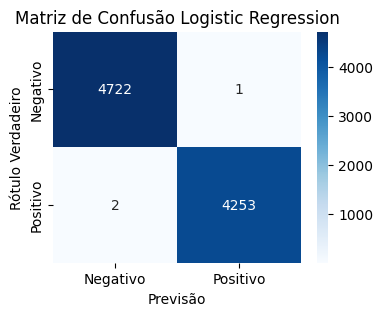

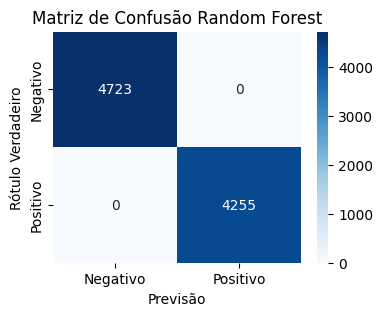

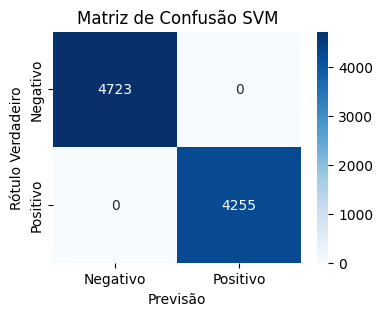

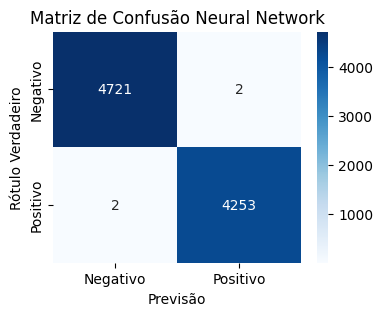

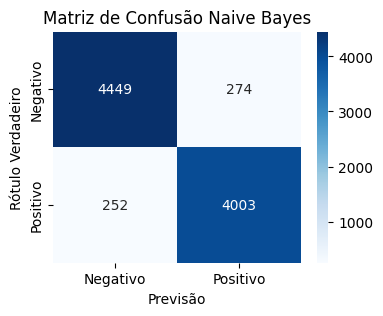

In [107]:
# Definir rótulos para as classes
labels = ['Negativo', 'Positivo']

for nome in resultados.keys():
    # Criando a Matriz de Confusão
    cm = confusion_matrix(y_test, resultados[nome])

    # Criar um DataFrame pandas a partir da matriz de confusão
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plotar a matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão ' + nome)
    plt.xlabel('Previsão')
    plt.ylabel('Rótulo Verdadeiro')
    plt.show()

# **Avaliação de Resultados:**

Ao julgar se uma notícia é falsa, tanto a precisão quanto a acurácia são métricas importantes, mas elas servem a propósitos ligeiramente diferentes:

Acurácia: A precisão mede a correção geral das previsões do modelo. Uma alta precisão é desejável, pois indica que o modelo está fazendo previsões corretas no geral.
Precisão: A precisão mede a proporção de previsões verdadeiramente positivas (notícias falsas corretamente sinalizadas) de todos os artigos que foram previstos como notícias falsas. Uma alta precisão é importante quando você deseja minimizar o número de falsos positivos, ou seja, quando você deseja ter confiança de que um artigo sinalizado como notícia falsa é de fato falso.

No contexto de sinalizar notícias falsas, a precisão é frequentemente considerada mais importante do que a acurácia. Isso porque falsos positivos (sinalizar um artigo legítimo como notícia falsa) podem ter consequências graves, como a disseminação de desinformação ou minar a confiança em fontes confiáveis. Portanto, você deseja garantir um alto nível de confiança nos artigos que você sinaliza como notícias falsas, mesmo que isso signifique sacrificar um pouco a acurácia.

No entanto, é essencial considerar ambas as métricas juntas e encontrar um equilíbrio entre elas com base nos requisitos e restrições específicos de sua aplicação. Em alguns casos, você pode priorizar a precisão em relação à exatidão, enquanto em outros, pode buscar um equilíbrio entre as duas. Além disso, considere outras métricas, como recall, pontuação F1 e matriz de confusão, para obter uma compreensão abrangente do desempenho do seu modelo.

Nós testes realizados o Algoritmo Random Forest e SVM apresentaram 100% de acurácia e precisão, isso pode ter diversas razões como:

*   Overfitting: O modelo pode estar superajustado aos dados de treinamento, o que significa que ele aprendeu os padrões específicos dos dados de treinamento tão bem que não consegue generalizar para novos dados. Isso pode levar a uma precisão e acurácia de 100% nos dados de treinamento, mas o desempenho pode ser significativamente pior em dados de teste ou dados não vistos.

*   Tamanho ou qualidade do conjunto de dados: Se o conjunto de dados de treinamento for muito pequeno ou de má qualidade, o modelo pode ser capaz de ajustar-se aos dados perfeitamente, mesmo que não seja capaz de generalizar bem para novos dados.

*   Imbalance de classe: Se houver um desequilíbrio significativo entre as classes no conjunto de dados, um modelo pode atingir altas métricas de desempenho simplesmente prevendo a classe majoritária em todos os casos. Isso pode resultar em altas precisão e acurácia, mas o modelo pode não estar fornecendo informações úteis sobre as classes minoritárias.

